<a href="https://colab.research.google.com/github/Weizhuo-Zhang/ML_coursera/blob/master/hands_on_ML/1_Machine_Learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv 

--2019-08-04 07:19:06--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405467 (396K) [text/plain]
Saving to: ‘oecd_bli_2015.csv.1’

oecd_bli_2015.csv.1 100%[===================>] 395.96K  --.-KB/s    in 0.03s   

2019-08-04 07:19:07 (12.9 MB/s) - ‘oecd_bli_2015.csv.1’ saved [405467/405467]

--2019-08-04 07:19:08--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
  oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
  oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
  gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
  gdp_per_capita.set_index("Country", inplace=True)
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capica,
                                left_index=True, right_index=True)
  full_country_stats.sort_values(by="GDP per capita", inplace=True)
  remove_indices = [0,1,6,8,33,34,35]
  keep_indices = list(set(range(36)) - set(remove_indices))
  return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
# load library
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [0]:
# load dataset
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capica = pd.read_csv("gdp_per_capita.csv", thousands=',',delimiter='\t',
                              encoding='latin1',na_values='n/a')

In [0]:
# prepare dataset
country_stats = prepare_country_stats(oecd_bli, gdp_per_capica)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

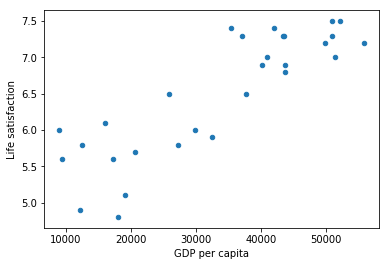

In [37]:
# Visulisation data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()